In [1]:
import vtk
from PIL import Image
ColorBackground = [0.0, 0.0, 0.0]
obj_path = './obj/mesh.obj'

In [4]:
def render(obj_path, png_path = './screenshot.png'):
    reader = vtk.vtkOBJReader()
    reader.SetFileName(obj_path)
    reader.Update()

    mapper = vtk.vtkPolyDataMapper()
    if vtk.VTK_MAJOR_VERSION <= 5:
         mapper.SetInput(reader.GetOutput())
    else:
         mapper.SetInputConnection(reader.GetOutputPort())
    actor = vtk.vtkActor()
    actor.SetMapper(mapper)

    # Create a rendering window and renderer
    ren = vtk.vtkRenderer()
    ren.SetBackground(ColorBackground)
    renWin = vtk.vtkRenderWindow()
    renWin.AddRenderer(ren)

    # Create a renderwindowinteractor
    #iren = vtk.vtkRenderWindowInteractor()
    #iren.SetRenderWindow(renWin)

    # Assign actor to the renderer
    ren.AddActor(actor)
    renWin.Render()

    # screenshot code:
    w2if = vtk.vtkWindowToImageFilter()
    w2if.SetInput(renWin)
    w2if.Update()

    writer = vtk.vtkPNGWriter()
    writer.SetFileName(png_path)
    writer.SetInputData(w2if.GetOutput())
    writer.Write()
    
    renWin.RemoveRenderer(ren)
    
    return(png_path)

    # Enable user interface interactor
    #iren.Initialize()
    #iren.Start()

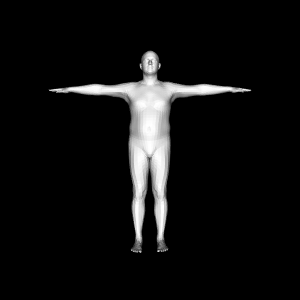

In [6]:
betas = [2,-1,0,0,0,0,0,0,0,0] 
obj_path = './obj'
for i, beta in enumerate(betas):
    if i%3 == 0:
        obj_path += ('/' + str(beta))
    else:
        obj_path += ('_' + str(beta))
obj_path += '_mesh.obj'

Image.open(render(obj_path))

In [7]:
import tkinter as tk

In [136]:
betas = None    
class ImageViewer():

    def __init__(self, window):
        self.canvas = tk.Canvas(window, width=600, height=600)
        self.canvas.grid(row=10, column=0)

        self.image_on_canvas = self.canvas.create_image(0, 0, anchor=tk.NW)
        
        self.betas = [0,0,0,0,0,0,0,0,0,0]
        
        def select1(s):
            self.betas[0] = int(s)
            self.view_pic()
        def select2(s):
            self.betas[1] = int(s)
            self.view_pic()
        def select3(s):
            self.betas[2] = int(s)
            self.view_pic()
        def select4(s):
            self.betas[3] = int(s)
            self.view_pic()
        def select5(s):
            self.betas[4] = int(s)
            self.view_pic()
        def select6(s):
            self.betas[5] = int(s)
            self.view_pic()
        def select7(s):
            self.betas[6] = int(s)
            self.view_pic()
        def select8(s):
            self.betas[7] = int(s)
            self.view_pic()
        def select9(s):
            self.betas[8] = int(s)
            self.view_pic()
        def select10(s):
            self.betas[9] = int(s)
            self.view_pic()
        var = []
        scale = []
        label = []
        commands = [select1,select2,select3,select4,select5,select6,select7,select8,select9,select10]
        for i in range(10):
            var.append(tk.IntVar())
            scale.append(tk.Scale(window, variable=var, command=commands[i], orient="horizontal", 
                                  showvalue=False, tickinterval=1, from_=-2, to=2, length=300))
            scale[-1].grid(row=i, column = 0)
    def view_pic(self):
        obj_path = './obj'
        for i, beta in enumerate(self.betas):
            if i%3 == 0:
                obj_path += ('/' + str(beta))
            else:
                obj_path += ('_' + str(beta))
        obj_path += '_mesh.obj'
        img_path = render(obj_path)
        self.img = tk.PhotoImage(file=img_path)
        self.canvas.itemconfig(self.image_on_canvas, image=self.img)
    


In [138]:
window = tk.Tk()
window.title("SMPL Image Viewer")
ImageViewer(window)
window.mainloop()

In [108]:
print(canvas)

None
